In [1]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze

# The Sidewinder Algorithm
## How does it work?
The Sidewinder algorithm is closely related to the binary tree algorithm, in which it involves randomly grouping a set of consecutive nodes in each row before carving any upward node. This is done by taking a node, and randomly deciding whether to carve east or not. If carved east, the node is added to the list of 'selected' nodes. Once we decide not to carve east, or we reach the end of the row, we then carve north for any one random node in our 'selected' list. An interesting point to note about this algorithm is that by necessity, the first row must always be fully carved eastwards, as carving north here is not possible.
## Is every node connected?
Yes every node is connected. This can be concluded by considering the graph row by row. The first row is always connected, by necessity. In the second row, each set of nodes that were selected have been carved northward, thus connecting that set to our first row, making the entire set connected. This can be applied to all selected sets of the row, and thus they are all connected. For the rest of the rows, we observe that this applies recursively, as each row is always connected to the row above.

In [2]:
def Sidewinder(maze):
    # The list temp will denote our currently selected set of nodes
    temp = []
    for y in range(0,maze.num_rows):
        # temp has to be emptied for each fresh row
        temp.clear()
        for x in range(0,maze.num_columns):
            # the first row has to have each node carved east out of necessity
            if y == 0 and x != maze.num_columns-1:
                maze.add_path((x,y), 'E', 0)
                continue
            elif y == 0 and x == maze.num_columns-1:
                continue
            # in case the set is empty, we select the current node
            if len(temp) == 0:
                temp.append(x)
            check = random.randint(0,1)
            # if we are at the last column of any row, we must randomly carve north out of the selected set
            if x == maze.num_columns-1:
                check = 1
            # if check = 0, we carve east and add the next node to our selected set
            if check == 0:
                temp.append(x+1)
                maze.add_path((x,y), 'E', 0)
            # if check = 1, we carve north for a random node from our selected set, and clear the set
            else:
                randval = random.randint(0,len(temp)-1)
                maze.add_path((temp[randval],y), 'N', 0)
                temp.clear()

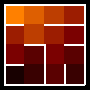

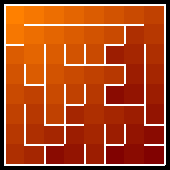

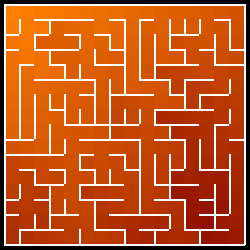

In [3]:
maze = Maze(4, 4)
Sidewinder(maze)
maze.add_colors(color=(255, 128, 0))
display(maze.draw(cell_width = 20))
maze.dump("Sidewinder_4x4.maze")
        
maze = Maze(8, 8)
Sidewinder(maze)
maze.add_colors(color=(255, 128, 0))
display(maze.draw(cell_width = 20))
maze.dump("Sidewinder_8x8.maze")

maze = Maze(16, 16)
Sidewinder(maze)
maze.add_colors(color=(255, 128, 0))
display(maze.draw(cell_width = 15))
maze.dump("Sidewinder_16x16.maze")

## Basic Analysis

### Time Complexity : O(N<sup>2</sup>)

In this algorithm, we iterate over each and every node once, in a left to right, then top to bottom fashion. Assuming the number of rows/columns being N, we get that the time complexity is equal to the number of nodes.

### Additional Space : O(N)

The additional space here is O(N) in worst case. This can be seen in the case where we are somehow able to carve east for the entire row, thus making the size of our selected set N, assuming the row has N nodes.

### Bias

A very obvious issue with this algorithm is that the first row of the maze will always have to be completely carved eastward, which maybe taken advantage of by solving algorithms as the first row can act as the 'root' from which the maze can be solved. 

In [4]:
total = {"Deadends": 0, "Straightways": 0, "LeftTurns": 0, "RightTurns": 0, "Junctions": 0, "Crossroads": 0}
for i in range(0, 100):
    maze = Maze(100, 100)
    Sidewinder(maze)
    partial = maze.benchmark()
    total["Deadends"] += partial["Deadends"]
    total["Straightways"] += partial["Straightways"]
    total["LeftTurns"] += partial["LeftTurns"]
    total["RightTurns"] += partial["RightTurns"]
    total["Junctions"] += partial["Junctions"]
    total["Crossroads"] += partial["Crossroads"]

div = 0
for i in total:
    div += total[i]

for i in total:
    total[i] /= div
    total[i] *= 100
    round(total[i], 3)

for i in total:
    print("%12s %s %3f" % (i, " : ", total[i]))

    Deadends  :  27.647100
Straightways  :  22.709300
   LeftTurns  :  12.419600
  RightTurns  :  12.349100
   Junctions  :  22.122700
  Crossroads  :  2.752200


### Further analysis
The sidewinder algorithm produces a pretty uniformly distributed maze. As we can see the deadend percentage is slightly high, but it is comparable to the rest of the types of nodes. This kind of maze can be used a large common passageway and multiple branches off of the main passageway are required. 